<a href="https://colab.research.google.com/github/mollah2022/Neural-Network/blob/main/Credit_Card_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install imbalanced-learn


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9692 - loss: 0.0834 - val_accuracy: 0.9925 - val_loss: 0.0235
Epoch 2/20
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.9933 - loss: 0.0209 - val_accuracy: 0.9957 - val_loss: 0.0144
Epoch 3/20
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.9963 - loss: 0.0134 - val_accuracy: 0.9973 - val_loss: 0.0106
Epoch 4/20
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 81s 3ms/step - accuracy: 0.9973 - loss: 0.0102 - val_accuracy: 0.9977 - val_loss: 0.0081
Epoch 5/20
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.9979 - loss: 0.0082 - val_accuracy: 0.9981 - val_loss: 0.0072
Epoch 6/20
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.9983 - loss: 0.0069 - val_accuracy: 0.9982 - val_loss: 0.0064
Epoch 7/20
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.9984 - loss: 0.0063 - val_accuracy: 0.9986 - val_loss: 0.0055
Epoch 8/20
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 

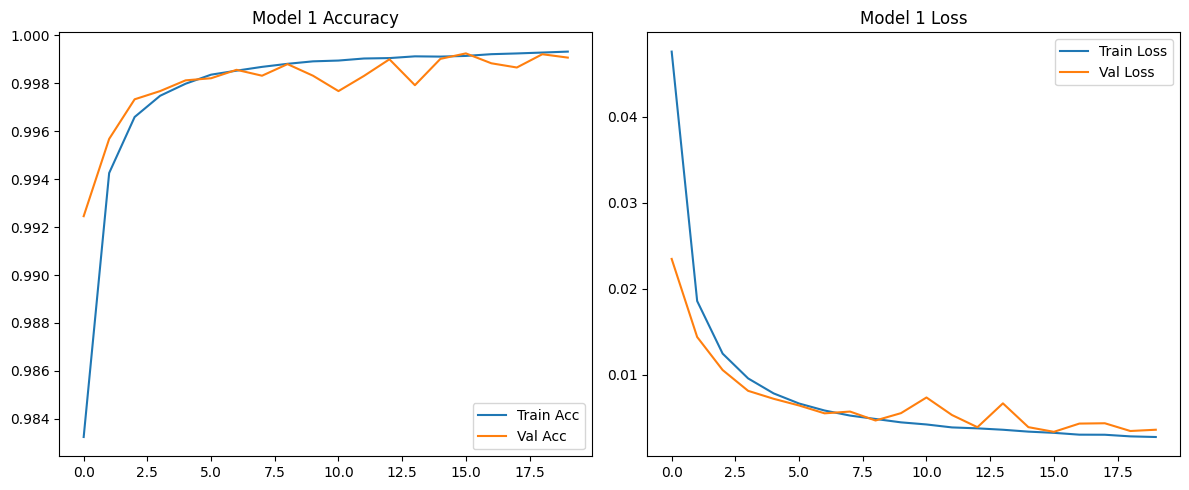

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# === Step 1: Load dataset ===
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/creditcard.csv")

# === Step 2: Separate features and label ===
X = df.drop('Class', axis=1)
y = df['Class']

# === Step 3: SMOTE for balancing ===
smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X, y)

# === Step 4: Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42)

# === Step 5: Scale data ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === Step 6: Build Neural Network Models ===

# === Model 1: Simple Neural Network ===
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history1 = model1.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test))

# === Evaluation ===
y_pred1 = (model1.predict(X_test_scaled) > 0.5).astype("int32")
print("\nModel 1 Report:")
print(classification_report(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

# === Plotting Accuracy & Loss ===
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history1.history['accuracy'], label='Train Acc')
plt.plot(history1.history['val_accuracy'], label='Val Acc')
plt.title('Model 1 Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label='Val Loss')
plt.title('Model 1 Loss')
plt.legend()
plt.tight_layout()
plt.show()
